In [2]:
import keras
from keras.layers import Activation, MaxPooling2D, Conv2D, Dense, Input, Dropout
from keras.layers import Flatten, BatchNormalization, AveragePooling2D
from keras.models import Model
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
mymodel = keras.applications.InceptionV3(include_top=True, input_shape=(299, 299, 3), weights=None, classes=30)

In [3]:
# mymodel.summary()

In [4]:
batch_size = 16

In [5]:
train_image = ImageDataGenerator(rescale=1./255)
train_generator = train_image.flow_from_directory('../data/train/province', 
                                                  target_size=(299, 299),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 4311 images belonging to 30 classes.


In [5]:
val_image = ImageDataGenerator(rescale=1./255)

val_generator = val_image.flow_from_directory('../data/val/province', 
                                              target_size=(299, 299), 
                                              batch_size=32, 
                                              class_mode='categorical')

Found 340 images belonging to 30 classes.


In [ ]:
mymodel.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
mymodel.fit_generator(train_generator, steps_per_epoch=3900//batch_size, epochs=10, 
                      validation_data=val_generator, validation_steps=340//32)

Epoch 1/10
243/243 [==============================] - 207s - loss: 5.0274e-05 - acc: 1.0000 - val_loss: 0.3721 - val_acc: 0.8929
Epoch 2/10
243/243 [==============================] - 207s - loss: 3.5037e-05 - acc: 1.0000 - val_loss: 0.4778 - val_acc: 0.8896
Epoch 3/10
243/243 [==============================] - 207s - loss: 2.9909e-05 - acc: 1.0000 - val_loss: 0.5389 - val_acc: 0.8701
Epoch 4/10
243/243 [==============================] - 208s - loss: 2.3596e-05 - acc: 1.0000 - val_loss: 0.4234 - val_acc: 0.8929
Epoch 5/10
243/243 [==============================] - 210s - loss: 6.1883e-05 - acc: 1.0000 - val_loss: 0.4419 - val_acc: 0.8831
Epoch 6/10
243/243 [==============================] - 207s - loss: 4.1832e-05 - acc: 1.0000 - val_loss: 0.3918 - val_acc: 0.9026
Epoch 7/10
243/243 [==============================] - 208s - loss: 1.7274e-05 - acc: 1.0000 - val_loss: 0.4517 - val_acc: 0.8831
Epoch 8/10
243/243 [==============================] - 209s - loss: 1.9709e-05 - acc: 1.0000 - val

In [ ]:
mymodel.save('../data/model_save/inception_model.h5')

In [3]:
mymodel = keras.models.load_model('../data/model_save/inception_model.h5')

In [4]:
classes = [
    'anhui', 
    'heilongjiang', 
    'ningxia', 
    'hubei', 
    'henan', 
    'hubei', 
    'zhejiang', 
    'jiangsu', 
    'chongqing', 
    'jiangxi',
    'liaoning',
    'fujian',
    'neimenggu',
    'qinghai',
    'shandong',
    'shanxi',
    'shanxi0',
    'tianjin',
    'sichuan',
    'xinjiang',
    'yunnan',
    'bejing',
    'gansu',
    'shanghai',
    'guangdong',
    'guangxi',
    'hainan',
    'guizhou',
    'hebei',
    'jilin']

In [18]:
test_image = ImageDataGenerator(rescale=1./255)

test_generator = val_image.flow_from_directory('../data/test', target_size=(299, 299), 
                                              batch_size=32, class_mode=None)

Found 15 images belonging to 1 classes.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
img, _ = iter(val_generator).next()

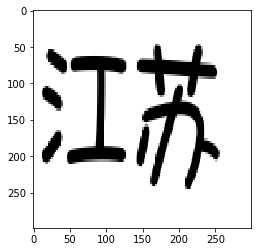

jiangsu


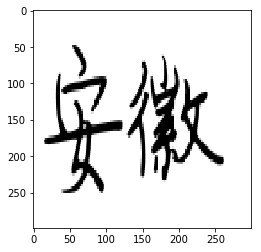

anhui


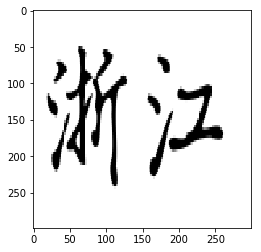

zhejiang


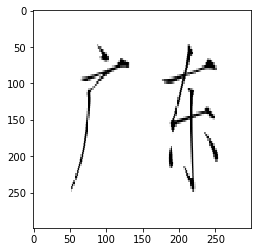

guangdong


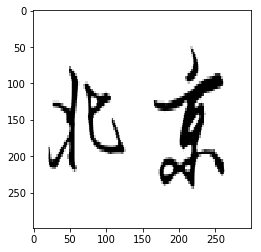

bejing


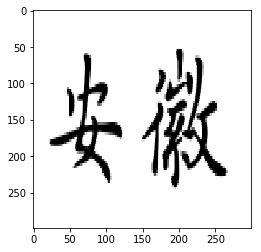

anhui


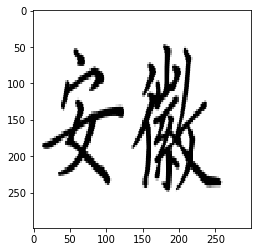

anhui


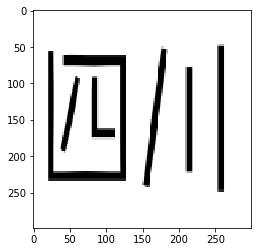

sichuan


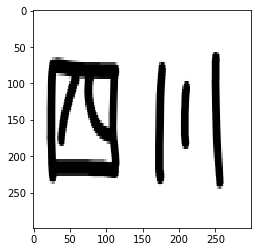

sichuan


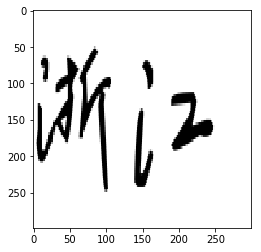

zhejiang


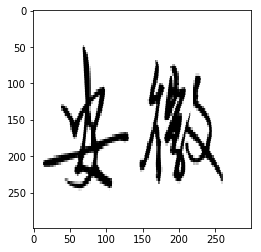

anhui


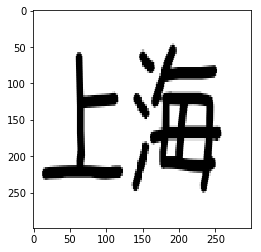

shanghai


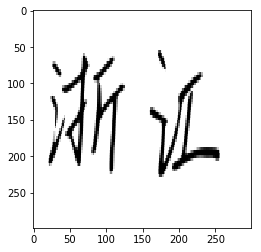

zhejiang


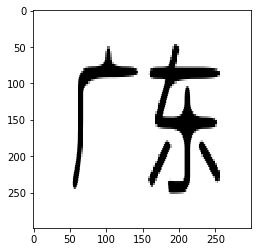

guangdong


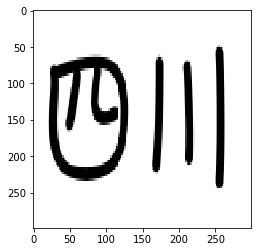

sichuan


In [8]:
for i in range(15):
    plt.imshow(img[i])
    plt.show()
    pred = mymodel.predict(img[i:i+1])
    label = np.argmax(pred, 1)
    print(classes[label[0]])

In [1]:
# import keras

# from keras.layers import Activation, MaxPooling2D, Conv2D, Dense, Input, Dropout
# from keras.layers import Flatten, BatchNormalization, AveragePooling2D
# from keras.models import Model
# from keras import layers
# from keras import optimizers

# def conv2d_bn(x, filters, num_row, num_col, padding='same', strides=(1, 1)):
#     x = Conv2D(filters, (num_row, num_col), strides=strides, padding=padding, use_bias=False)(x)
#     x = BatchNormalization(axis=-1)(x)
#     x = Activation('relu')(x)
#     return x

# def InceptionV3(img_input):
#     x = conv2d_bn(img_input, 32, 3, 3, strides=(2, 2), padding='valid')
#     x = conv2d_bn(x, 32, 3, 3, padding='valid')
#     x = conv2d_bn(x, 64, 3, 3)
#     x = MaxPooling2D((3, 3), strides=(2, 2))(x)

#     x = conv2d_bn(x, 80, 1, 1, padding='valid')
#     x = conv2d_bn(x, 192, 3, 3, padding='valid')
#     x = MaxPooling2D((3, 3), strides=(2, 2))(x)

#     # mixed 0, 1, 2: 35 x 35 x 256
#     branch1x1 = conv2d_bn(x, 64, 1, 1)

#     branch5x5 = conv2d_bn(x, 48, 1, 1)
#     branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

#     branch3x3dbl = conv2d_bn(x, 64, 1, 1)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

#     branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
#     branch_pool = conv2d_bn(branch_pool, 32, 1, 1)
#     x = keras.layers.concatenate(
#         [branch1x1, branch5x5, branch3x3dbl, branch_pool],
#         axis=-1)

#     # mixed 1: 35 x 35 x 256
#     branch1x1 = conv2d_bn(x, 64, 1, 1)

#     branch5x5 = conv2d_bn(x, 48, 1, 1)
#     branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

#     branch3x3dbl = conv2d_bn(x, 64, 1, 1)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

#     branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
#     branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
#     x = layers.concatenate(
#         [branch1x1, branch5x5, branch3x3dbl, branch_pool],
#         axis=-1)

#     # mixed 2: 35 x 35 x 256
#     branch1x1 = conv2d_bn(x, 64, 1, 1)

#     branch5x5 = conv2d_bn(x, 48, 1, 1)
#     branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

#     branch3x3dbl = conv2d_bn(x, 64, 1, 1)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

#     branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
#     branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
#     x = layers.concatenate(
#         [branch1x1, branch5x5, branch3x3dbl, branch_pool],
#         axis=-1)

#     # mixed 3: 17 x 17 x 768
#     branch3x3 = conv2d_bn(x, 384, 3, 3, strides=(2, 2), padding='valid')

#     branch3x3dbl = conv2d_bn(x, 64, 1, 1)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
#     branch3x3dbl = conv2d_bn(
#         branch3x3dbl, 96, 3, 3, strides=(2, 2), padding='valid')

#     branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
#     x = layers.concatenate(
#         [branch3x3, branch3x3dbl, branch_pool], axis=-1)

#     # mixed 4: 17 x 17 x 768
#     branch1x1 = conv2d_bn(x, 192, 1, 1)

#     branch7x7 = conv2d_bn(x, 128, 1, 1)
#     branch7x7 = conv2d_bn(branch7x7, 128, 1, 7)
#     branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

#     branch7x7dbl = conv2d_bn(x, 128, 1, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 1, 7)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

#     branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
#     branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
#     x = layers.concatenate(
#         [branch1x1, branch7x7, branch7x7dbl, branch_pool],
#         axis=-1)

#     # mixed 5, 6: 17 x 17 x 768
#     for i in range(2):
#         branch1x1 = conv2d_bn(x, 192, 1, 1)

#         branch7x7 = conv2d_bn(x, 160, 1, 1)
#         branch7x7 = conv2d_bn(branch7x7, 160, 1, 7)
#         branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

#         branch7x7dbl = conv2d_bn(x, 160, 1, 1)
#         branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
#         branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 1, 7)
#         branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
#         branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

#         branch_pool = AveragePooling2D(
#             (3, 3), strides=(1, 1), padding='same')(x)
#         branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
#         x = layers.concatenate(
#             [branch1x1, branch7x7, branch7x7dbl, branch_pool],
#             axis=-1)

#     # mixed 7: 17 x 17 x 768
#     branch1x1 = conv2d_bn(x, 192, 1, 1)

#     branch7x7 = conv2d_bn(x, 192, 1, 1)
#     branch7x7 = conv2d_bn(branch7x7, 192, 1, 7)
#     branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

#     branch7x7dbl = conv2d_bn(x, 192, 1, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

#     branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
#     branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
#     x = layers.concatenate(
#         [branch1x1, branch7x7, branch7x7dbl, branch_pool],
#         axis=-1)

#     # mixed 8: 8 x 8 x 1280
#     branch3x3 = conv2d_bn(x, 192, 1, 1)
#     branch3x3 = conv2d_bn(branch3x3, 320, 3, 3,
#                           strides=(2, 2), padding='valid')

#     branch7x7x3 = conv2d_bn(x, 192, 1, 1)
#     branch7x7x3 = conv2d_bn(branch7x7x3, 192, 1, 7)
#     branch7x7x3 = conv2d_bn(branch7x7x3, 192, 7, 1)
#     branch7x7x3 = conv2d_bn(
#         branch7x7x3, 192, 3, 3, strides=(2, 2), padding='valid')

#     branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
#     x = layers.concatenate(
#         [branch3x3, branch7x7x3, branch_pool], axis=-1)

#     # mixed 9: 8 x 8 x 2048
#     for i in range(2):
#         branch1x1 = conv2d_bn(x, 320, 1, 1)

#         branch3x3 = conv2d_bn(x, 384, 1, 1)
#         branch3x3_1 = conv2d_bn(branch3x3, 384, 1, 3)
#         branch3x3_2 = conv2d_bn(branch3x3, 384, 3, 1)
#         branch3x3 = layers.concatenate(
#             [branch3x3_1, branch3x3_2], axis=-1)

#         branch3x3dbl = conv2d_bn(x, 448, 1, 1)
#         branch3x3dbl = conv2d_bn(branch3x3dbl, 384, 3, 3)
#         branch3x3dbl_1 = conv2d_bn(branch3x3dbl, 384, 1, 3)
#         branch3x3dbl_2 = conv2d_bn(branch3x3dbl, 384, 3, 1)
#         branch3x3dbl = layers.concatenate(
#             [branch3x3dbl_1, branch3x3dbl_2], axis=-1)

#         branch_pool = AveragePooling2D(
#             (3, 3), strides=(1, 1), padding='same')(x)
#         branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
#         x = layers.concatenate(
#             [branch1x1, branch3x3, branch3x3dbl, branch_pool],
#             axis=-1)
#     x = AveragePooling2D(5, 1, 'valid')(x)
#     x = Flatten()(x)
#     x = Dense(6, activation='sigmoid')(x)
#     model = Model(inputs=img_input, outputs=x)
#     return model

# input_tensor = Input(shape=(224, 224, 3))
# inception_model = InceptionV3(input_tensor)

# # from keras.utils.vis_utils import model_to_dot

# # mymodel = model_to_dot(inception_model, show_shapes=True)

# # mymodel.write_png('./model.png')

# # sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
# # inception_model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

# # batch_size = 32

# # from keras.preprocessing.image import ImageDataGenerator

# # train_image = ImageDataGenerator(rescale=1./255)

# # train_generator = train_image.flow_from_directory('../data/train/province', target_size=(224, 224),
# #                                                  batch_size=batch_size,
# #                                                  class_mode='categorical'
# #                                                  )

# # inception_model.fit_generator(train_generator, steps_per_epoch=340//batch_size, epochs=20)

Using TensorFlow backend.
